In [12]:
path ='/users/mandy/desktop/test.txt'
text_file = open(path, "r")
lines = text_file.readlines()
print(lines)
print(len(lines))
#pythonlines = lines.filter(lambda line: 'python' in line)

def haspython(line):
    return 'python' in line
haspython('123 python')




['This directory exists so that 3rd party packages can be installed\n', 'here.  \n', 'Read the source for site.py for more details.\n', '\n', '123 python\n', 'Test python 22\n', '\n']
7


True

## Project 4: Trading using google trends

In [18]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data, wb

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

%matplotlib inline  

## Data organization
### Data from the paper
same data with the paper's,  Dow Jones Industrial Average (DJIA)

In [17]:
paper = pd.read_csv('PreisMoatStanley2013.dat', delimiter=' ', parse_dates=[0, 1, 100, 101])
paper[:5]

,Google Start Date,Google End Date,arts,banking,bonds,...,war,water,world,DJIA Date,DJIA Closing Price
0,2004-01-04,2004-01-10,0.956667,0.193333,0.203333,...,2.02000,1.91333,4.83333,2004-01-12,10485.18
1,2004-01-11,2004-01-17,0.970000,0.203333,0.186667,...,2.09333,1.93333,4.76667,2004-01-20,10528.66
2,2004-01-18,2004-01-24,0.926667,0.196667,0.190000,...,1.97333,1.89333,4.60000,2004-01-26,10702.51
3,2004-01-25,2004-01-31,0.950000,0.196667,0.180000,...,1.90667,1.92000,4.53333,2004-02-02,10499.18
4,2004-02-01,2004-02-07,0.893333,0.203333,0.183333,...,2.08667,1.88667,4.53333,2004-02-09,10579.03


In [73]:
pdata = pd.DataFrame({'GoogleWE': paper['Google End Date'], 
                    'debt': paper['debt'].astype(np.float64),
                    'DJIADate': paper['DJIA Date'],
                    'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})
pdata

,DJIAClose,DJIADate,GoogleWE,debt
0,10485.18,2004-01-12,2004-01-10,0.210000
1,10528.66,2004-01-20,2004-01-17,0.210000
2,10702.51,2004-01-26,2004-01-24,0.210000
3,10499.18,2004-02-02,2004-01-31,0.213333
4,10579.03,2004-02-09,2004-02-07,0.200000
...,...,...,...,...
368,11891.93,2011-01-31,2011-01-29,0.190000
369,12161.63,2011-02-07,2011-02-05,0.176667
370,12268.19,2011-02-14,2011-02-12,0.173333
371,12212.79,2011-02-22,2011-02-19,0.180000


### Gathering our DJIA data from Quandl

In [57]:
import quandl 
#djia = quandl.get("WIKI/KO", start_date='2016-01-01', end_date='2017-09-01')  # this line can work well
#djia = quandl.get('YAHOO/INDEX_DJI', start_date = '2004-01-01', end_date='2011-02-28') # cannot get yahoo data now

# load data from the csv file
djia = pd.read_csv('djia.csv', index_col=0)
djia[:10]

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2004-01-02,10452.7,10527.0,10384.3,10409.9,1688900.0,10409.9
2004-01-05,10411.9,10544.1,10411.9,10544.1,2212900.0,10544.1
2004-01-06,10543.9,10549.2,10499.9,10538.7,1914600.0,10538.7
2004-01-07,10535.5,10539.5,10466.3,10529.0,2254900.0,10529.0
2004-01-08,10530.1,10592.6,10530.1,10592.4,2377700.0,10592.4
2004-01-09,10589.3,10589.3,10448.7,10458.9,2232500.0,10458.9
2004-01-12,10461.6,10491.6,10444.2,10485.2,1979600.0,10485.2
2004-01-13,10485.2,10509.9,10367.4,10427.2,1973100.0,10427.2
2004-01-14,10428.7,10548.5,10428.7,10538.4,1862800.0,10538.4


In [68]:
djia_closes = djia['Close'].reset_index()
djia_closes[:5]

,Date,Close
0,2004-01-02,10409.9
1,2004-01-05,10544.1
2,2004-01-06,10538.7
3,2004-01-07,10529.0
4,2004-01-08,10592.4


In [83]:
# pdata['DJIADate'] type is datetime64, but djia_closes['Date'] type is object
# so we need to convert object to datetime before two dataframes
djia_closes['Date'] = pd.to_datetime(djia_closes['Date'])
data = pd.merge(pdata, djia_closes, left_on='DJIADate', right_on='Date')
# drop one date column, axis=0 for rows, 1 for columns
data.drop(['DJIADate'], inplace=True, axis=1)  #  inplace=True was added in pandas v0.13
data = data.set_index('Date')
data

,DJIAClose,GoogleWE,debt,Close
Date,,,,
2004-01-12,10485.18,2004-01-10,0.210000,10485.2
2004-01-20,10528.66,2004-01-17,0.210000,10528.7
2004-01-26,10702.51,2004-01-24,0.210000,10702.5
2004-02-02,10499.18,2004-01-31,0.213333,10499.2
2004-02-09,10579.03,2004-02-07,0.200000,10579.0
...,...,...,...,...
2011-01-31,11891.93,2011-01-29,0.190000,11891.9
2011-02-07,12161.63,2011-02-05,0.176667,12161.6
2011-02-14,12268.19,2011-02-12,0.173333,12268.2


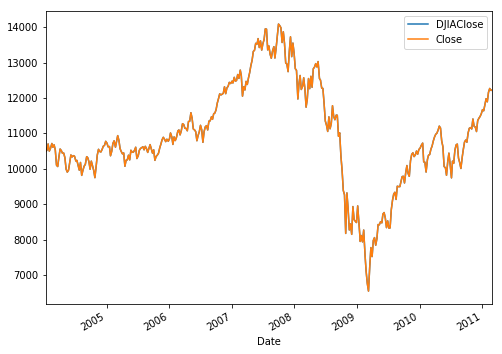

In [94]:
# examine authors vs our djia data
data[['DJIAClose', 'Close']].plot(figsize=(8,6))

In [95]:
(data['DJIAClose']-data['Close']).describe()

count    373.000000
mean      -0.004933
std        0.030032
min       -0.050000
25%       -0.030000
50%       -0.010000
75%        0.020000
max        0.040000
dtype: float64

In [96]:
data[['DJIAClose', 'Close']].corr()

,DJIAClose,Close
DJIAClose,1.0,1.0
Close,1.0,1.0


### Google trends data

In [97]:
# show first 10 lines of the file
!head trends_report_debt.csv  # on mac or linux
#type trends_report_debt.csv  # on windows

Web Search interest: debt
United States; Jan 2004 - Feb 2011

Interest over time
Week,debt
2004-01-04 - 2004-01-10,63
2004-01-11 - 2004-01-17,60
2004-01-18 - 2004-01-24,61
2004-01-25 - 2004-01-31,63
2004-02-01 - 2004-02-07,61


In [168]:
# my code 
t = pd.read_csv('trends_report_debt.csv', skiprows=4)
#t[370:382] 
t = t[:374]
for i in range(374):
    w = t.iloc[i].Week
    t.iloc[i].Week = w.split(' ')[-1]
    #w = w.split(' ')[-1]
    #t.iloc[i].Week = pd.to_datetime(w)
    
t['Week'] = pd.to_datetime(t['Week'])
t.set_index('Week')
print('week index type:') 
print(type(t.index))
t = t[t['Week']<='2011-02-28']  # 因为type不对，不能直接用时间区间，未解决！
t

index type:
<class 'pandas.core.indexes.range.RangeIndex'>


,Week,debt
0,2004-01-10,63
1,2004-01-17,60
2,2004-01-24,61
3,2004-01-31,63
4,2004-02-07,61
...,...,...
368,2011-01-29,65
369,2011-02-05,57
370,2011-02-12,58
371,2011-02-19,64


In [169]:
from io import StringIO
with open('trends_report_debt.csv') as f:
    data_section = f.read().split('\n\n')[1]
    trends_data = pd.read_csv(StringIO(data_section), header=1, index_col='Week',
                             converters={'Week': lambda x: pd.to_datetime(x.split(' ')[-1]) } )

print('week index type:')
print(type(trends_data.index))
our_debt_trends = trends_data['2004-01-01':'2011-02-28'].reset_index()
our_debt_trends  

week index type:
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Week,debt
0,2004-01-10,63
1,2004-01-17,60
2,2004-01-24,61
3,2004-01-31,63
4,2004-02-07,61
...,...,...
368,2011-01-29,65
369,2011-02-05,57
370,2011-02-12,58
371,2011-02-19,64


In [174]:
final = pd.merge(data.reset_index(), our_debt_trends, left_on='GoogleWE', right_on='Week', 
                 suffixes=['P', 'O'])  # suffixes 把debt_x, debt_y 的后缀改成P, O
final.drop('Week', inplace=True, axis=1)
final.set_index('Date', inplace=True)
final[:5]

,DJIAClose,GoogleWE,debtP,Close,debtO
Date,,,,,
2004-01-12,10485.18,2004-01-10,0.210000,10485.2,63
2004-01-20,10528.66,2004-01-17,0.210000,10528.7,60
2004-01-26,10702.51,2004-01-24,0.210000,10702.5,61
2004-02-02,10499.18,2004-01-31,0.213333,10499.2,63
2004-02-09,10579.03,2004-02-07,0.200000,10579.0,61


In [175]:
combined_trends = final[['GoogleWE', 'debtP', 'debtO']].set_index('GoogleWE')
combined_trends

,debtP,debtO
GoogleWE,,
2004-01-10,0.210000,63
2004-01-17,0.210000,60
2004-01-24,0.210000,61
2004-01-31,0.213333,63
2004-02-07,0.200000,61
...,...,...
2011-01-29,0.190000,65
2011-02-05,0.176667,57
2011-02-12,0.173333,58


In [176]:
combined_trends.corr()

,debtP,debtO
debtP,1.00000,0.95766
debtO,0.95766,1.00000


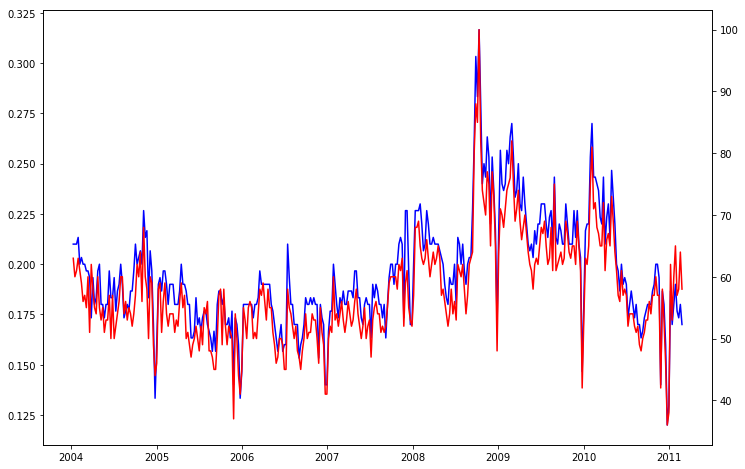

In [184]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(combined_trends.index, combined_trends.debtP, color='b')
ax2 = ax1.twinx()
ax2.plot(combined_trends.index, combined_trends.debtO, color='r')
#plt.savefig('google trends debt.png')

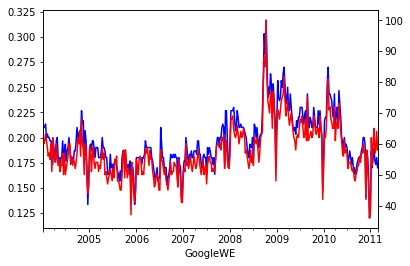

In [188]:
# my code
combined_trends['debtP'].plot(color='b')
plt.twinx()
combined_trends['debtO'].plot(color='r')

### Generate order signals

In [192]:
# set googleweek as index 
base = final.reset_index().set_index('GoogleWE')
base.drop('DJIAClose', inplace=True, axis=1)
base

,Date,debtP,Close,debtO
GoogleWE,,,,
2004-01-10,2004-01-12,0.210000,10485.2,63
2004-01-17,2004-01-20,0.210000,10528.7,60
2004-01-24,2004-01-26,0.210000,10702.5,61
2004-01-31,2004-02-02,0.213333,10499.2,63
2004-02-07,2004-02-09,0.200000,10579.0,61
...,...,...,...,...
2011-01-29,2011-01-31,0.190000,11891.9,65
2011-02-05,2011-02-07,0.176667,12161.6,57
2011-02-12,2011-02-14,0.173333,12268.2,58


In [203]:
# calculate the rolling mean of the previous three weeks for each week
#base['PMA'] = pd.rolling_mean(base.debtP.shift(1), 3)
base['PMA'] = pd.Series.rolling(base.debtP, window=3).mean().shift(1) # here shift 1 row 后移一行，显示前三周的平均值
base['OMA'] = pd.Series.rolling(base.debtO, 3).mean().shift(1)
base

,Date,debtP,Close,debtO,PMA,OMA
GoogleWE,,,,,,
2004-01-10,2004-01-12,0.210000,10485.2,63,NaN,NaN
2004-01-17,2004-01-20,0.210000,10528.7,60,NaN,NaN
2004-01-24,2004-01-26,0.210000,10702.5,61,NaN,NaN
2004-01-31,2004-02-02,0.213333,10499.2,63,0.210000,61.333333
2004-02-07,2004-02-09,0.200000,10579.0,61,0.211111,61.333333
...,...,...,...,...,...,...
2011-01-29,2011-01-31,0.190000,11891.9,65,0.178889,58.333333
2011-02-05,2011-02-07,0.176667,12161.6,57,0.180000,59.333333
2011-02-12,2011-02-14,0.173333,12268.2,58,0.182222,60.666667


In [213]:
# calculate the order signals
# for the papers data
base['signalP'] = 0  # default to 0
base.loc[base.debtP > base.PMA, 'signalP'] = -1  # .loc[row_indexer, clo_indexer]
base.loc[base.debtP < base.PMA, 'signalP'] = 1

# for our data
base['signalO'] = 0
base.loc[base.debtO > base.OMA, 'signalO'] = -1
base.loc[base.debtO < base.OMA, 'signalO'] = 1
base[['debtP', 'PMA', 'signalP', 'debtO', 'OMA', 'signalO']]

,debtP,PMA,signalP,debtO,OMA,signalO
GoogleWE,,,,,,
2004-01-10,0.210000,NaN,0,63,NaN,0
2004-01-17,0.210000,NaN,0,60,NaN,0
2004-01-24,0.210000,NaN,0,61,NaN,0
2004-01-31,0.213333,0.210000,-1,63,61.333333,-1
2004-02-07,0.200000,0.211111,1,61,61.333333,1
...,...,...,...,...,...,...
2011-01-29,0.190000,0.178889,-1,65,58.333333,-1
2011-02-05,0.176667,0.180000,1,57,59.333333,1
2011-02-12,0.173333,0.182222,1,58,60.666667,1


### Computing returns

In [219]:
# add in next week's percentage change to each week of data
# We shift the percentage change back one week as we want to multiply the signal value 
# for the current week by the next percentage change from the next week
base['PctChg'] = base.Close.pct_change().shift(-1)  # shift -1，默认的pct change是后一行除前一行，这里将数据上移一行
base[['Close', 'PctChg', 'signalP', 'signalO']]  

,Close,PctChg,signalP,signalO
GoogleWE,,,,
2004-01-10,10485.2,0.004149,0,0
2004-01-17,10528.7,0.016507,0,0
2004-01-24,10702.5,-0.018996,0,0
2004-01-31,10499.2,0.007601,-1,-1
2004-02-07,10579.0,0.012846,1,1
...,...,...,...,...
2011-01-29,11891.9,0.022679,-1,-1
2011-02-05,12161.6,0.008765,1,1
2011-02-12,12268.2,-0.004516,1,1


In [220]:
# calculate returns
base['retP'] = base.PctChg * base.signalP
base['retO'] = base.PctChg * base.signalO
base[['Close', 'PctChg', 'signalP', 'signalO', 'retP', 'retO']]

,Close,PctChg,signalP,signalO,retP,retO
GoogleWE,,,,,,
2004-01-10,10485.2,0.004149,0,0,0.000000,0.000000
2004-01-17,10528.7,0.016507,0,0,0.000000,0.000000
2004-01-24,10702.5,-0.018996,0,0,-0.000000,-0.000000
2004-01-31,10499.2,0.007601,-1,-1,-0.007601,-0.007601
2004-02-07,10579.0,0.012846,1,1,0.012846,0.012846
...,...,...,...,...,...,...
2011-01-29,11891.9,0.022679,-1,-1,-0.022679,-0.022679
2011-02-05,12161.6,0.008765,1,1,0.008765,0.008765
2011-02-12,12268.2,-0.004516,1,1,-0.004516,-0.004516


### Cumulative returns and the result of the strategy

In [221]:
# calculate and report the cumulative returns
base['cumretP'] = (1+base.retP).cumprod()-1
base['cumretO'] = (1+base.retO).cumprod()-1
base[['cumretP', 'cumretO']]

,cumretP,cumretO
GoogleWE,,
2004-01-10,0.000000,0.000000
2004-01-17,0.000000,0.000000
2004-01-24,0.000000,0.000000
2004-01-31,-0.007601,-0.007601
2004-02-07,0.005148,0.005148
...,...,...
2011-01-29,2.701492,0.846524
2011-02-05,2.733936,0.862710
2011-02-12,2.717075,0.854298


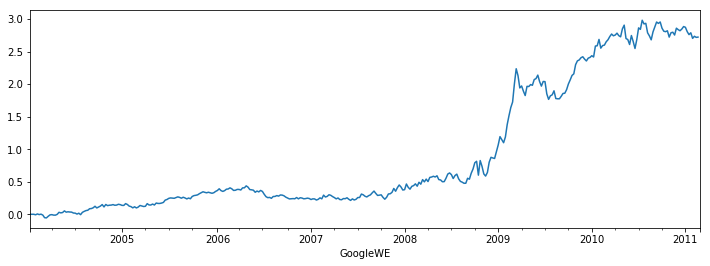

In [222]:
# show graph of growth for the paper data
base['cumretP'].plot(figsize=(12,4))


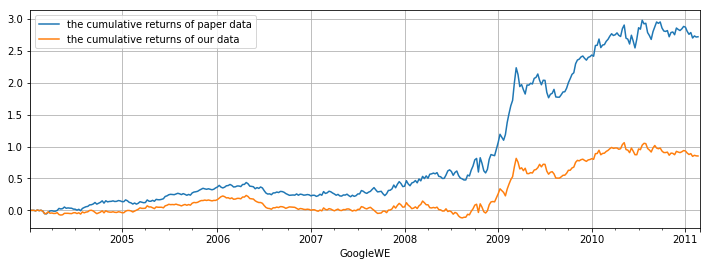

In [229]:
# base[['cumretP', 'cumretO']].plot()
base['cumretP'].plot(figsize=(12,4), label = 'the cumulative returns of paper data')
base['cumretO'].plot(label = 'the cumulative returns of our data')
plt.legend(loc='best')
plt.grid()
#plt.savefig('project 4 google trends cumulative returns.png')